# **Exploratory Data Analysis of Dubai Real Estate Data**

In [169]:
# Importation of Python Modules
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [173]:
rent_data = pd.read_csv("./rents.csv")

**Exploration of Rent Data**

In [174]:

rent_data

,REGISTRATION_DATE,START_DATE,END_DATE,VERSION_EN,AREA_EN,CONTRACT_AMOUNT,ANNUAL_AMOUNT,IS_FREE_HOLD_EN,ACTUAL_AREA,PROP_TYPE_EN,PROP_SUB_TYPE_EN,ROOMS,USAGE_EN,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,PARKING,TOTAL_PROPERTIES,MASTER_PROJECT_EN,PROJECT_EN
0,2025-01-01 00:46:39,2025-01-31 00:00:00,2026-01-30 00:00:00,Renewed,Al Karama,59000.0,59000.0,Non Free Hold,83.60,Unit,Flat,NaN,Residential,ADCB Metro Station,Dubai Mall,Burj Khalifa,NaN,1,NaN,NaN
1,2025-01-01 02:47:08,2025-01-04 00:00:00,2026-01-03 00:00:00,Renewed,Burj Khalifa,50000.0,50000.0,Free Hold,84.27,Unit,Flat,NaN,Residential,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Downtown Dubai,NaN,1,NaN,UPPER CREST
2,2025-01-01 05:09:30,2025-01-31 00:00:00,2026-01-30 00:00:00,Renewed,Al Saffa First,68000.0,68000.0,Non Free Hold,80.36,Unit,Flat,NaN,Residential,Business Bay Metro Station,Dubai Mall,Burj Khalifa,NaN,1,NaN,NaN
3,2025-01-01 06:27:45,2025-01-10 00:00:00,2026-01-09 00:00:00,Renewed,Ras Al Khor Industrial Third,43050.0,43050.0,Non Free Hold,78.76,Unit,Flat,NaN,Residential,Creek Metro Station,City Centre Mirdif,Dubai International Airport,NaN,1,NaN,NaN
4,2025-01-01 06:37:20,2025-01-05 00:00:00,2026-01-04 00:00:00,Renewed,Ras Al Khor Industrial Third,36179.0,36179.0,Non Free Hold,57.41,Unit,Flat,NaN,Residential,Rashidiya Metro Station,City Centre Mirdif,Dubai International Airport,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82847,2025-01-25 23:48:18,2024-12-16 00:00:00,2025-12-15 00:00:00,New,Al Barsha South Fourth,67200.0,67200.0,Free Hold,59.81,Unit,Flat,NaN,Residential,Dubai Internet City,Mall of the Emirates,Sports City Swimming Academy,NaN,1,NaN,Burj Sabah
82848,2025-01-25 23:50:21,2025-02-09 00:00:00,2026-02-08 00:00:00,Renewed,Jabal Ali First,45149.0,45149.0,Free Hold,81.00,Unit,Flat,NaN,Residential,NaN,NaN,NaN,NaN,1,NaN,NaN
82849,2025-01-25 23:51:50,2024-12-16 00:00:00,2025-12-15 00:00:00,New,Al Barsha South Fourth,67200.0,67200.0,Free Hold,58.29,Unit,Flat,NaN,Residential,Dubai Internet City,Mall of the Emirates,Sports City Swimming Academy,NaN,1,NaN,Burj Sabah
82850,2025-01-25 23:54:28,2024-12-16 00:00:00,2025-12-15 00:00:00,New,Al Barsha South Fourth,67200.0,67200.0,Free Hold,51.62,Unit,Flat,NaN,Residential,Dubai Internet City,Mall of the Emirates,Sports City Swimming Academy,NaN,1,NaN,Burj Sabah


In [175]:
rent_data_description = pd.read_csv("./rent_description.csv")
rent_data_description

,Field name,Description,Type
0,Ejari Contract Number,NaN,Integer
1,Registration Date,Date of registration,Date & Time
2,Start Date,Start date of the rental,Date & Time
3,End Date,End date of the rental,Date & Time
4,Property ID,NaN,Integer
5,Version,NaN,String
6,Area1,Dubaï area,String
7,Contract Amount,contract amount in AED,Float
8,Annual Amount,annual amount in AED,Float
9,Is Free Hold?,NaN,String


**The Rent Data DataSet Is a dataset representing rent data from 1st January,2025 to 26th January 2025**

# **Hypothesis for Exploration of Rent Data**
From the exploratory data analysis of Rent Data, we are going to compare the relationships between the Metrics of the data sets to draw business oriented insights which can be used in making business decisions.


In [177]:
#Length of Data set
# print(rent_data.columns)
rent_data = rent_data.drop(columns=['REGISTRATION_DATE', 'START_DATE', 'END_DATE','VERSION_EN','ROOMS','PARKING','MASTER_PROJECT_EN'])
rent_data

,AREA_EN,CONTRACT_AMOUNT,ANNUAL_AMOUNT,IS_FREE_HOLD_EN,ACTUAL_AREA,PROP_TYPE_EN,PROP_SUB_TYPE_EN,USAGE_EN,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,TOTAL_PROPERTIES,PROJECT_EN
0,Al Karama,59000.0,59000.0,Non Free Hold,83.60,Unit,Flat,Residential,ADCB Metro Station,Dubai Mall,Burj Khalifa,1,NaN
1,Burj Khalifa,50000.0,50000.0,Free Hold,84.27,Unit,Flat,Residential,Buj Khalifa Dubai Mall Metro Station,Dubai Mall,Downtown Dubai,1,UPPER CREST
2,Al Saffa First,68000.0,68000.0,Non Free Hold,80.36,Unit,Flat,Residential,Business Bay Metro Station,Dubai Mall,Burj Khalifa,1,NaN
3,Ras Al Khor Industrial Third,43050.0,43050.0,Non Free Hold,78.76,Unit,Flat,Residential,Creek Metro Station,City Centre Mirdif,Dubai International Airport,1,NaN
4,Ras Al Khor Industrial Third,36179.0,36179.0,Non Free Hold,57.41,Unit,Flat,Residential,Rashidiya Metro Station,City Centre Mirdif,Dubai International Airport,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82847,Al Barsha South Fourth,67200.0,67200.0,Free Hold,59.81,Unit,Flat,Residential,Dubai Internet City,Mall of the Emirates,Sports City Swimming Academy,1,Burj Sabah
82848,Jabal Ali First,45149.0,45149.0,Free Hold,81.00,Unit,Flat,Residential,NaN,NaN,NaN,1,NaN
82849,Al Barsha South Fourth,67200.0,67200.0,Free Hold,58.29,Unit,Flat,Residential,Dubai Internet City,Mall of the Emirates,Sports City Swimming Academy,1,Burj Sabah
82850,Al Barsha South Fourth,67200.0,67200.0,Free Hold,51.62,Unit,Flat,Residential,Dubai Internet City,Mall of the Emirates,Sports City Swimming Academy,1,Burj Sabah


# **A Report on the Total Amount in AED going to different regions in Area 1(Dubai Areas)**

In [178]:
Dubai_Areas = list(rent_data['AREA_EN'].unique())
Total_Amounts = list(rent_data.groupby(['AREA_EN'])['CONTRACT_AMOUNT'].sum())
Total_Amounts_in_Billion = [amount / 1000000000 for amount in Total_Amounts]
# print(Dubai_Areas)
# print(len(Dubai_Areas))
# print(len(Total_Amounts))

area_contract_data = pd.DataFrame({
    'Area': Dubai_Areas,
    'Total_Contract_Amount': Total_Amounts_in_Billion
})
top_10_cities = area_contract_data.sort_values(by='Total_Contract_Amount', ascending=False).head(10)



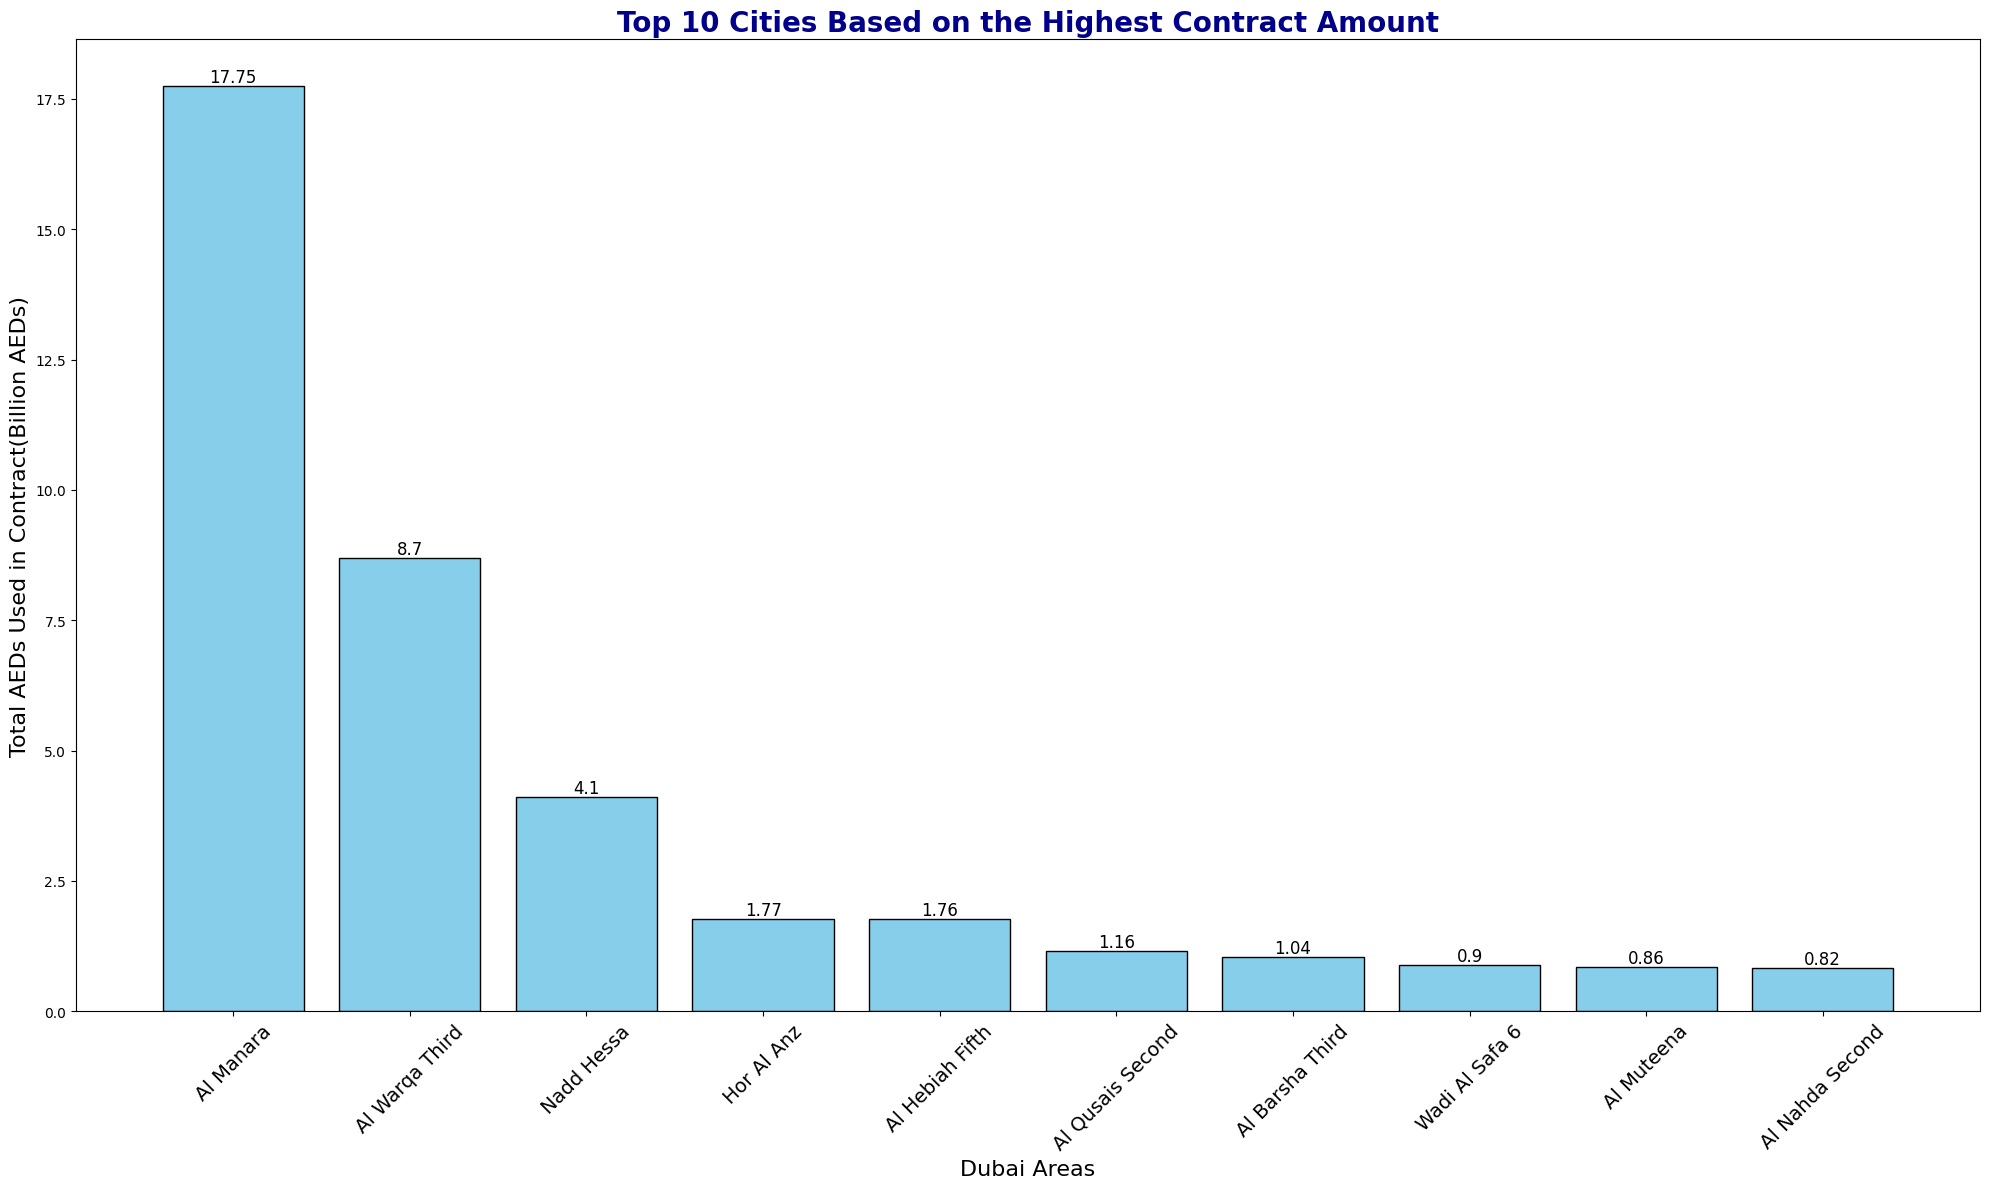

In [179]:
plt.figure(figsize=(20, 12))
plt.bar(top_10_cities["Area"], top_10_cities["Total_Contract_Amount"], color='skyblue', edgecolor='black')
plt.xticks(rotation=45, fontsize=14)
plt.xlabel('Dubai Areas',fontsize=16)
plt.ylabel('Total AEDs Used in Contract(Billion AEDs)',fontsize=16)
plt.title('Bar Chart between X and Y Metrics')

plt.title('Top 10 Cities Based on the Highest Contract Amount', fontsize=20, fontweight='bold', color='darkblue', loc='center')


# Bar Numbering
for index, value in enumerate(top_10_cities["Total_Contract_Amount"]):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# **A Report on the Total Amount in AED going to different Property Types**

In [180]:

Property_types = list(rent_data['PROP_TYPE_EN'].unique())
Mean_Amounts = list(rent_data.groupby(['PROP_TYPE_EN'])['CONTRACT_AMOUNT'].mean())
Total_Amounts = list(rent_data.groupby(['PROP_TYPE_EN'])['CONTRACT_AMOUNT'].sum())
Total_Amounts_in_Billion = [amount / 1000000000 for amount in Total_Amounts]
Mean_Amounts_in_Million = [amount/1000000 for amount in Mean_Amounts]

property_contract_data = pd.DataFrame({
    'Property_Type': Property_types,
    'Mean_Amounts': Mean_Amounts_in_Million,
    'Total_Contract_Amount': Total_Amounts_in_Billion
})
# property_contract_data

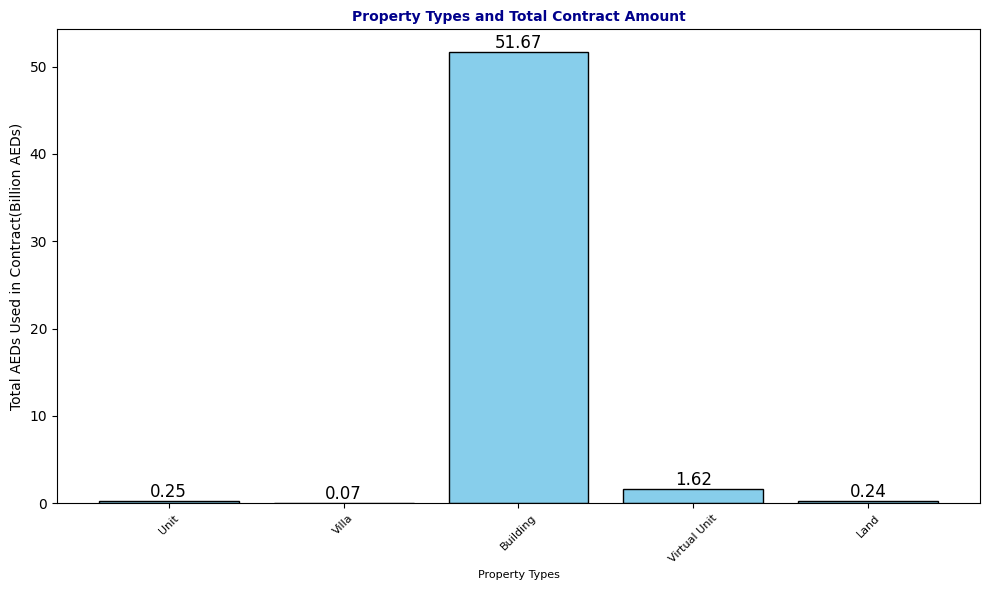

In [181]:
plt.figure(figsize=(10, 6))
plt.bar(property_contract_data["Property_Type"], property_contract_data["Total_Contract_Amount"], color='skyblue', edgecolor='black')
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('Property Types',fontsize=8)
plt.ylabel('Total AEDs Used in Contract(Billion AEDs)',fontsize=10)

plt.title('Property Types and Total Contract Amount', fontsize=10, fontweight='bold', color='darkblue', loc='center')


# Bar Numbering
for index, value in enumerate(property_contract_data["Total_Contract_Amount"]):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

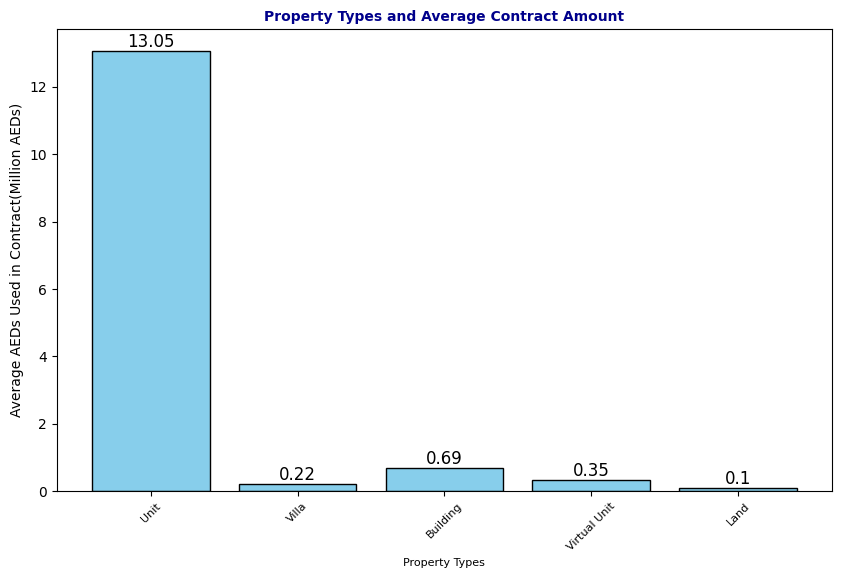

In [182]:
plt.figure(figsize=(10, 6))
plt.bar(property_contract_data["Property_Type"], property_contract_data["Mean_Amounts"], color='skyblue', edgecolor='black')
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('Property Types',fontsize=8)
plt.ylabel('Average AEDs Used in Contract(Million AEDs)',fontsize=10)

plt.title('Property Types and Average Contract Amount', fontsize=10, fontweight='bold', color='darkblue', loc='center')


# Bar Numbering
for index, value in enumerate(property_contract_data["Mean_Amounts"]):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=12)

# Show the plot

plt.show()

In [197]:
prop_sub_dataset = rent_data[['PROP_SUB_TYPE_EN','CONTRACT_AMOUNT','TOTAL_PROPERTIES']]
# prop_sub_dataset = prop_sub_dataset.dropna(axis=0,how="any")
property_sub_types = list(prop_sub_dataset['PROP_SUB_TYPE_EN'].unique())
Total_Amounts = list(prop_sub_dataset.groupby(['PROP_SUB_TYPE_EN'])['CONTRACT_AMOUNT'].sum())
Total_properties = list(prop_sub_dataset.groupby(['PROP_SUB_TYPE_EN'])['TOTAL_PROPERTIES'].sum())
Mean_Amounts = [total_amount/total_properties for total_amount,total_properties in zip(Total_Amounts,Total_properties)]

# property_subtype_data = pd.DataFrame({
#     'Property_Sub_Type': property_sub_types,
#     'Mean_Amounts': Mean_Amounts,
#     'Total_Contract_Amount': Total_Amounts,
# })

# print(len(Property_sub_types),

prop_dataset = prop_sub_dataset.groupby(['PROP_SUB_TYPE_EN']).agg({'CONTRACT_AMOUNT': 'sum', 'TOTAL_PROPERTIES': 'sum'}).reset_index()
prop_dataset['Mean_Amounts'] = prop_dataset['CONTRACT_AMOUNT'] / prop_dataset['TOTAL_PROPERTIES']

frequent_property_types = prop_dataset.sort_values(by='TOTAL_PROPERTIES', ascending=False).head(10)
frequent_property_types

,PROP_SUB_TYPE_EN,CONTRACT_AMOUNT,TOTAL_PROPERTIES,Mean_Amounts
20,Labor Camps,2.118810e+10,529398,40022.998768
12,Flat,1.892856e+10,136450,138721.600341
17,Hotel,4.525000e+09,45600,99232.453509
25,Office,2.833240e+09,16339,173403.489763
36,Shop,3.523824e+09,16259,216730.666343
18,Hotel apartments,9.000000e+06,8190,1098.901099
46,Villa,1.536811e+09,7490,205181.725441
48,Warehouse,2.613017e+08,1375,190037.630909
43,Studio,2.968310e+07,720,41226.531278
37,Showroom,2.353203e+08,556,423237.921853


# **Hypothesis For Exploration of Transaction Data**
In this section we are going to carry out some exploration data analysis on the relationships between different Metrics on the The Transaction data.

In [201]:
transaciton_data = pd.read_csv("./transactions.csv")
transaction_description = pd.read_csv("./transaction_description.csv")
transaction_description

,Field name,Description,Type
0,Transaction Number,NaN,String
1,Transaction Date,Date and time of the transaction,Date & Time
2,Property ID,NaN,Integer
3,Transaction Type,"Type of transaction (Sales, Gifts, Mortgage)",String
4,Transaction sub type,Sub type of the transaction (Sell - Pre regist...,String
5,Registration type,"Type of registration (Ready, Off-Plan)",String
6,Is Free Hold?,NaN,String
7,Usage,"Usage (Commercial, Residential)",String
8,Area,Dubaï area,String
9,Property Type,"Type of property (Unit, Land, Building)",String


In [204]:
transaction_data

,TRANSACTION_NUMBER,INSTANCE_DATE,GROUP_EN,PROCEDURE_EN,IS_OFFPLAN_EN,IS_FREE_HOLD_EN,USAGE_EN,AREA_EN,PROP_TYPE_EN,PROP_SB_TYPE_EN,...,ACTUAL_AREA,ROOMS_EN,PARKING,NEAREST_METRO_EN,NEAREST_MALL_EN,NEAREST_LANDMARK_EN,TOTAL_BUYER,TOTAL_SELLER,MASTER_PROJECT_EN,PROJECT_EN
0,102-1-2025,2025-01-07 15:57:40,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,Wadi Al Safa 4,Unit,Flat,...,68.67,1 B/R,1,NaN,NaN,NaN,1,1,NaN,Lacina
1,102-10-2025,2025-01-02 08:23:00,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,DUBAI SCIENCE PARK,Unit,Flat,...,47.25,Studio,1,First Abu Dhabi Bank Metro Station,Mall of the Emirates,Motor City,1,1,NaN,Binghatti Hills
2,102-100-2025,2025-01-02 15:18:51,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,AL FURJAN,Unit,Hotel Apartment,...,32.35,Studio,1,ENERGY Metro Station,Ibn-e-Battuta Mall,Expo 2020 Site,1,1,NaN,AZIZI JEWEL
3,102-1000-2025,2025-01-08 11:02:57,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,Wadi Al Safa 5,Unit,Flat,...,259.03,2 B/R,2,NaN,NaN,NaN,1,1,NaN,Verdes by Haven 1
4,102-100058-2024,2025-01-25 14:16:04,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE TRIANGLE,Unit,Flat,...,30.27,Studio,1,Damac Properties,Marina Mall,Sports City Swimming Academy,1,1,NaN,RED SQUARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14531,93-1-2025,2025-01-13 12:08:06,Sales,Delayed Sell Development,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,Flat,...,87.61,1 B/R,G-62,NaN,City Centre Mirdif,NaN,1,1,NaN,TOPAZ RESIDENCES 2
14532,95-1-2025,2025-01-07 14:29:17,Sales,Delayed Development,Ready,Non Free Hold,Residential,DUBAI INVESTMENT PARK SECOND,Unit,Flat,...,143.11,2 B/R,15-3B-22,NaN,NaN,Expo 2020 Site,0,0,NaN,RITAJ
14533,95-2-2025,2025-01-07 21:48:47,Sales,Delayed Development,Ready,Non Free Hold,Residential,DUBAI INVESTMENT PARK SECOND,Unit,Flat,...,41.81,Studio,14GB25,NaN,NaN,Expo 2020 Site,0,0,NaN,RITAJ
14534,95-3-2025,2025-01-14 12:14:16,Sales,Delayed Development,Ready,Non Free Hold,Residential,DUBAI INVESTMENT PARK SECOND,Unit,Flat,...,45.51,Studio,14GA24,NaN,NaN,Expo 2020 Site,0,0,NaN,RITAJ
